#Predicting Spotify Song Streams Machine Learning Models
Team 9  


This notebook specifically focuses on model evaluation.

We:
- Preprocessed and cleaned the dataset.
- Explored important variables through descriptive analysis.
- Trained and evaluated multiple models, including Linear Regression, Ridge, Lasso, Elastic Net, K-Nearest Neighbors, Decision Tree, Random Forest, AdaBoosting, and Gradient Boosting.
- Tuned model hyperparameters using nested cross-validation.
- Selected the best-performing model based on test MSE and R² scores.


**Importing necessary libraries for data loading, modeling, and visualization**

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/final_spotify.csv')
df.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,...,tempo,duration_ms,weeks_on_chart,streams,num_collaborators,artist_followers,artist_popularity,Total Grammy Awards,Total Nominations,TikTok_Viral
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,...,120.963,188491,17,107527761,2,23713940,83.0,0,0,Not Viral
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,...,191.153,193680,2,9944865,1,12085390,75.0,1,4,Not Viral
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,...,148.033,222973,125,512388123,1,7760689,79.0,0,0,Not Viral
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,...,167.911,284856,2,11985346,2,25197819,77.5,1,7,Not Viral
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,...,97.014,193507,30,301860377,2,102588498,93.0,4,33,Not Viral


**Data Visualization**

In [ ]:
df.shape

(6513, 25)

In [ ]:
df.isnull().sum()

,0
id,0
artist_names,0
track_name,0
source,0
key,0
mode,0
time_signature,0
danceability,0
energy,0
speechiness,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6513 non-null   object 
 1   artist_names         6513 non-null   object 
 2   track_name           6513 non-null   object 
 3   source               6513 non-null   object 
 4   key                  6513 non-null   object 
 5   mode                 6513 non-null   object 
 6   time_signature       6513 non-null   object 
 7   danceability         6513 non-null   float64
 8   energy               6513 non-null   float64
 9   speechiness          6513 non-null   float64
 10  acousticness         6513 non-null   float64
 11  instrumentalness     6513 non-null   float64
 12  liveness             6513 non-null   float64
 13  valence              6513 non-null   float64
 14  loudness             6513 non-null   float64
 15  tempo                6513 non-null   f

In [ ]:
df.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,num_collaborators,artist_followers,artist_popularity,Total Grammy Awards,Total Nominations
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03,6513.000000,6.513000e+03,6513.000000,6513.000000,6513.000000
mean,0.681731,0.636522,0.121933,0.236761,0.012469,0.180168,0.492412,-6.350667,122.117244,202566.684170,13.614924,1.089647e+08,1.636419,3.346373e+07,80.201382,2.149240,8.208506
std,0.141787,0.164813,0.113441,0.244784,0.075151,0.138054,0.227001,2.536114,29.416097,49199.592333,24.084051,2.276695e+08,0.950482,3.661780e+07,11.662492,5.321381,17.016779
min,0.150000,0.021800,0.023200,0.000008,0.000000,0.019700,0.032000,-34.475000,46.718000,30133.000000,1.000000,2.525159e+06,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.591000,0.534000,0.044000,0.044400,0.000000,0.097400,0.316000,-7.564000,98.007000,173038.000000,1.000000,8.695060e+06,1.000000,6.199500e+06,74.500000,0.000000,0.000000
50%,0.698000,0.651000,0.072200,0.145000,0.000000,0.124000,0.489000,-5.983000,120.034000,198367.000000,4.000000,2.712856e+07,1.000000,2.058185e+07,82.000000,0.000000,0.000000
75%,0.785000,0.759000,0.163000,0.356000,0.000041,0.219000,0.669000,-4.673000,142.025000,226003.000000,16.000000,9.951456e+07,2.000000,4.465754e+07,88.000000,1.000000,7.000000
max,0.985000,0.989000,0.966000,0.994000,0.953000,0.977000,0.982000,1.509000,212.117000,690732.000000,367.000000,3.528450e+09,11.000000,1.414777e+08,100.000000,49.000000,124.000000


In [ ]:
#extract numeric features
numeric_df = df.select_dtypes(include='number')
numeric_df.columns

Index(['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo',
       'duration_ms', 'weeks_on_chart', 'streams', 'num_collaborators',
       'artist_followers', 'artist_popularity', 'Total Grammy Awards',
       'Total Nominations'],
      dtype='object')

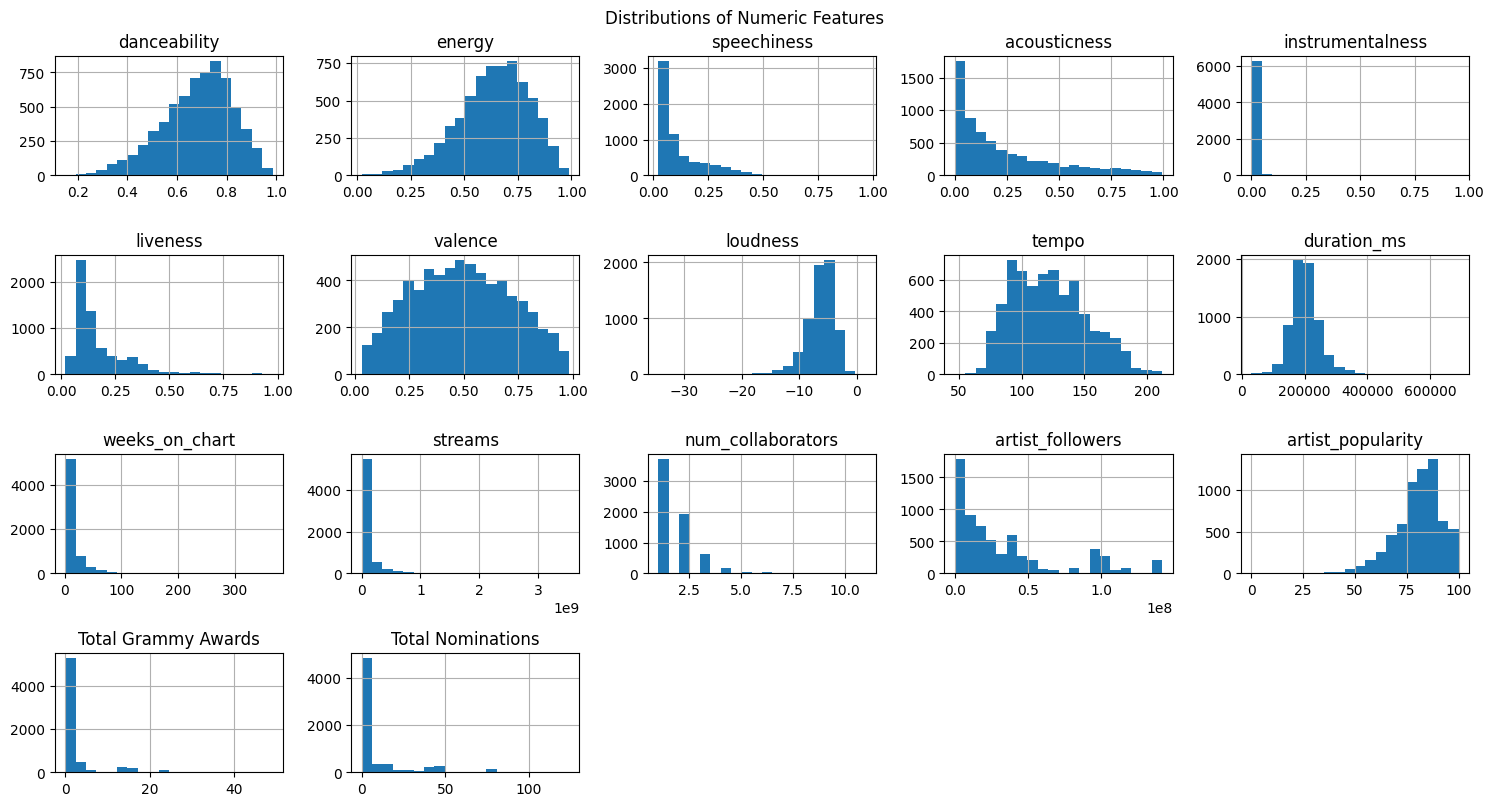

In [ ]:
#histagram of numeric feature distributions
numeric_df.hist(bins=20, figsize=(15, 12), layout=(6, 5))
plt.suptitle("Distributions of Numeric Features")
plt.tight_layout()
plt.show()

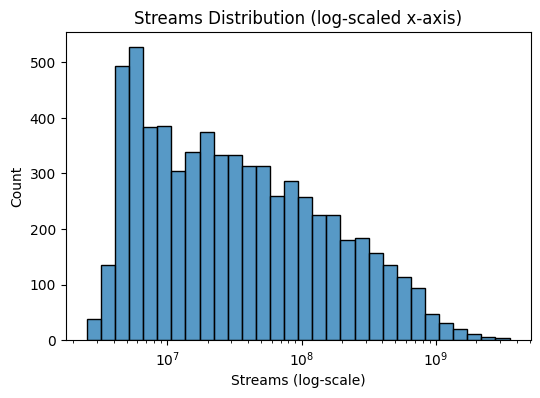

In [ ]:
#log-scaled distribution of target variable (since heavily right skewed)
plt.figure(figsize=(6,4))
sns.histplot(df['streams'], bins=30, log_scale=(True, False))
plt.title("Streams Distribution (log-scaled x-axis)")
plt.xlabel("Streams (log-scale)")
plt.show()

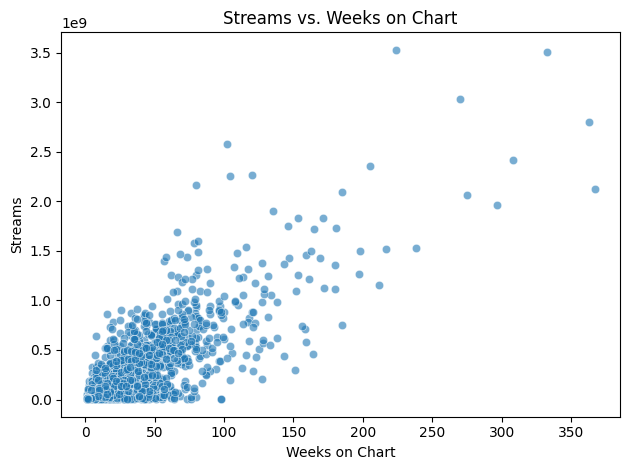

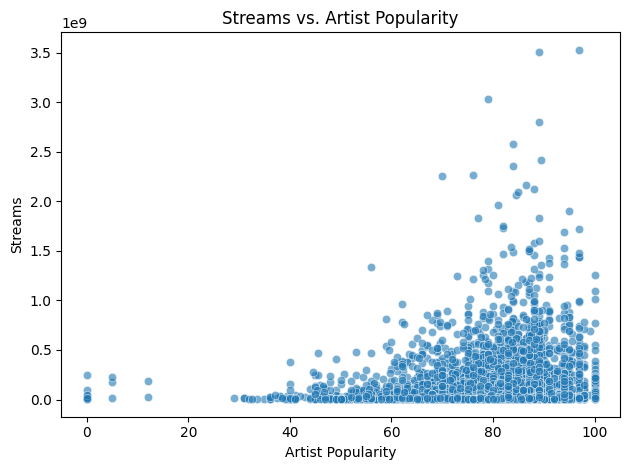

In [ ]:
#extra plots
#Weeks on Chart vs. Streams
sns.scatterplot(data=df, x='weeks_on_chart', y='streams', alpha=0.6)
plt.title('Streams vs. Weeks on Chart')
plt.xlabel('Weeks on Chart')
plt.ylabel('Streams')
plt.tight_layout()
plt.show()

#Artist Popularity vs. Streams
sns.scatterplot(data=df, x='artist_popularity', y='streams', alpha=0.6)
plt.title('Streams vs. Artist Popularity')
plt.xlabel('Artist Popularity')
plt.ylabel('Streams')
plt.tight_layout()
plt.show()

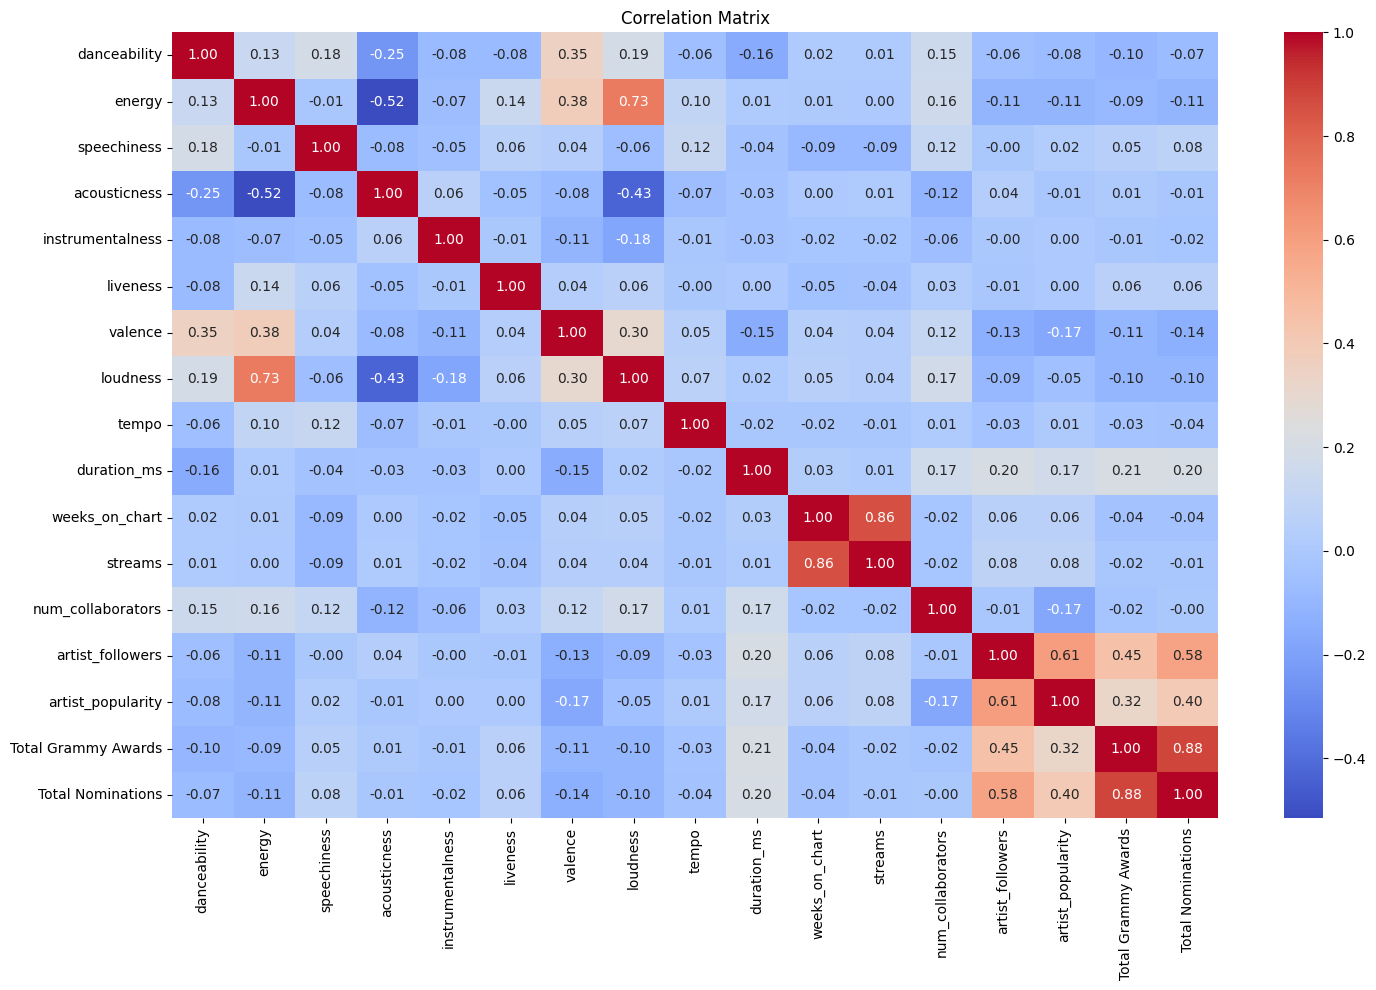

In [ ]:
#Checking for multicollinearity through correlation heatmap
corr = numeric_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Data Preprocessing**

In [ ]:
cleaned_df = df.drop(columns=['id', 'artist_names', 'track_name', 'source','streams'])

cleaned_df['TikTok_Viral'].replace(('Viral', 'Not Viral'), (1, 0), inplace=True)

categorical_columns = ['key', 'mode', 'time_signature']

cleaned_df = pd.get_dummies(cleaned_df, columns=categorical_columns, drop_first=True)
cleaned_df.head()

<ipython-input-13-d83ff50b7c38>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['TikTok_Viral'].replace(('Viral', 'Not Viral'), (1, 0), inplace=True)
<ipython-input-13-d83ff50b7c38>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df['TikTok_Viral'].replace(('Viral', 'Not Viral')

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,...,key_D#/Eb,key_E,key_F,key_F#/Gb,key_G,key_G#/Ab,mode_Minor,time_signature_3 beats,time_signature_4 beats,time_signature_5 beats
0,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,...,False,False,False,False,True,False,False,False,True,False
1,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,...,False,False,False,False,False,False,True,False,True,False
2,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,...,False,False,False,False,False,False,False,False,True,False
3,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,...,False,False,False,False,False,False,False,False,True,False
4,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
#initilize dictionary to hold performance metrics
results = {}

In [ ]:
#predicting number of streams
X = cleaned_df
y = np.log(df['streams']) #transform using log scale due to heavy skewed y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

**Baseline Model - sets a minimal standard**   
Predicting the mean offers no meaningful predictive power, highlighting the importance of building more advanced models.

In [ ]:
baseline_num = np.mean(y_train) #baseline prediction number is the training mean
baseline_mse = mean_squared_error(y_test, [baseline_num] * len(y_test)) #predict baseline_num for all y_test
baseline_r2 = r2_score(y_test, [baseline_num] * len(y_test))

results['Baseline'] = {'mse': f"{baseline_mse:.4f}", 'r2': f"{baseline_r2:.4e}"}

print(f"Baseline MSE: {baseline_mse:.4f}")
print(f"Baseline R²: {baseline_r2:.4e}")

Baseline MSE: 2.2136
Baseline R²: -9.7698e-10


**Linear Regression**  
Trains on the full training set and evaluates performance on both the training and testing data.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
#tranining
yhat_lr_train = lr.predict(X_train)
lr_mse = mean_squared_error(y_train, yhat_lr_train)
lr_r2 = r2_score(y_train, yhat_lr_train)
#testing
yhat_lr_test = lr.predict(X_test)
test_mse_lr = mean_squared_error(y_test, yhat_lr_test)
test_r2_lr = r2_score(y_test, yhat_lr_test)

results['Linear Regression'] = {'mse': f"{test_mse_lr:.4f}", 'r2': f"{test_r2_lr:.4f}"}

print(f"Linear Regression Train MSE: {lr_mse:.4f}")
print(f"Linear Regression Train R²: {lr_r2:.4f}")
print()
print(f"Linear Regression Test MSE: {test_mse_lr:.4f}")
print(f"Linear Regression Test R²: {test_r2_lr:.4f}")

Linear Regression Train MSE: 1.2166
Linear Regression Train R²: 0.4745

Linear Regression Test MSE: 1.0719
Linear Regression Test R²: 0.5158


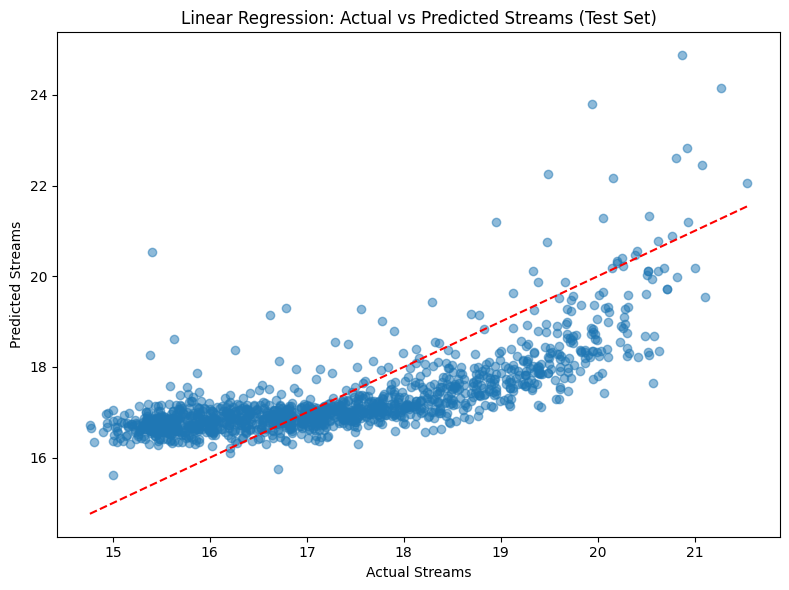

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yhat_lr_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Streams")
plt.ylabel("Predicted Streams")
plt.title("Linear Regression: Actual vs Predicted Streams (Test Set)")
plt.tight_layout()
plt.show()

This plot compares the actual number of streams to the predicted number of streams on the test set using our Linear Regression model. The red dashed line represents the ideal scenario where predictions perfectly match the actual values. We observe that while there is a general upward trend, the points are widely scattered around the line, especially for songs with higher streams, indicating that the Linear Regression model struggles to capture the variance in the data and tends to underpredict higher stream values.


**Linear Regression with Cross Validation**   
Using 5-fold cross-validation to better estimate the model's ability to generalize to unseen data.

In [ ]:
from sklearn.linear_model import LinearRegression
cv_results = cross_validate(LinearRegression(), X_train, y_train,cv=5,scoring=('neg_mean_squared_error', 'r2'),return_train_score=True)

#training
train_mse = -cv_results['train_neg_mean_squared_error']
train_r2 = cv_results['train_r2']

#testing
test_mse = -cv_results['test_neg_mean_squared_error']
test_r2 = cv_results['test_r2']


print("Linear Regression with Cross Validation Training")
print(f"Train MSE per fold: {train_mse}")
print(f"Avg Train MSE: {train_mse.mean():.4f}")
print(f"Train R² per fold: {train_r2}")
print(f"Avg Train R²: {train_r2.mean():.4f}")

print()
print("Linear Regression with Cross Validation Testing")
print(f"Test MSE per fold: {test_mse}")
print(f"Avg Test MSE: {test_mse.mean():.4f}")
print(f"Test R² per fold: {test_r2}")
print(f"Avg Test R²: {test_r2.mean():.4f}")

Linear Regression with Cross Validation Training
Train MSE per fold: [1.22371542 1.19015458 1.23252102 1.19819277 1.22360904]
Avg Train MSE: 1.2136
Train R² per fold: [0.47251752 0.48650967 0.4661523  0.48078682 0.4724766 ]
Avg Train R²: 0.4757

Linear Regression with Cross Validation Testing
Test MSE per fold: [1.19936931 1.33593664 1.17110994 1.30387292 1.20412921]
Avg Test MSE: 1.2429
Test R² per fold: [0.477105   0.41951458 0.49801432 0.44339061 0.47275114]
Avg Test R²: 0.4622


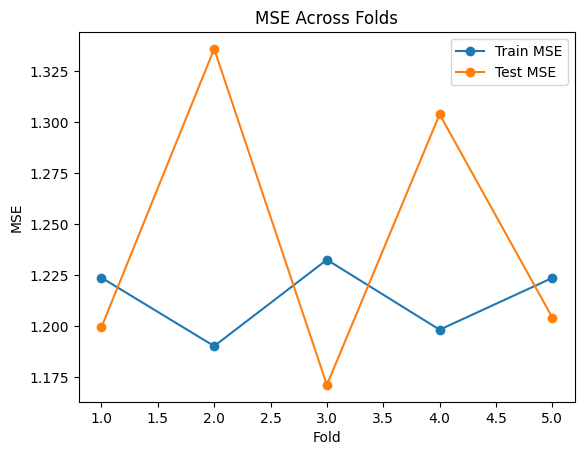

In [ ]:
# plot per fold
import matplotlib.pyplot as plt

folds = range(1, len(train_mse) + 1)
plt.plot(folds, train_mse, label="Train MSE", marker='o')
plt.plot(folds, test_mse, label="Test MSE", marker='o')
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.legend()
plt.title("MSE Across Folds")
plt.show()

The plot shows that training MSE is stable across folds, while testing MSE varies slightly more. The relatively small gap suggests that the model generalizes reasonably well across different splits.

**Ridge with Hyperparameter Tuning**    
Adds L2 regularization to reduce model complexity and prevent overfitting. Using GridSearchCV to tune alpha over multiple values to find the best-performing model.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

ridge_pipe = make_pipeline(StandardScaler(), Ridge())
alphas = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_pipe, param_grid=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
#training
ridge_yhat_train = ridge_grid.predict(X_train)
ridge_train_mse = mean_squared_error(y_train, ridge_yhat_train)
ridge_train_r2 = r2_score(y_train, ridge_yhat_train)
#testing
ridge_yhat_test = ridge_grid.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_yhat_test)
ridge_r2 = r2_score(y_test, ridge_yhat_test)

results['Ridge'] = {'mse': f"{ridge_mse:.4f}", 'r2': f"{ridge_r2:.4f}"} #add to dict

print("Ridge Best alpha:", ridge_grid.best_params_)
print(f"Ridge Train MSE: {ridge_train_mse:.4f}")
print(f"Ridge Train R²:  {ridge_train_r2:.4f}")
print()
print(f"Ridge Test MSE: {ridge_mse:.4f}")
print(f"Ridge Test R²:  {ridge_r2:.4f}")

Ridge Best alpha: {'ridge__alpha': 100}
Ridge Train MSE: 1.2170
Ridge Train R²:  0.4743

Ridge Test MSE: 1.0758
Ridge Test R²:  0.5140


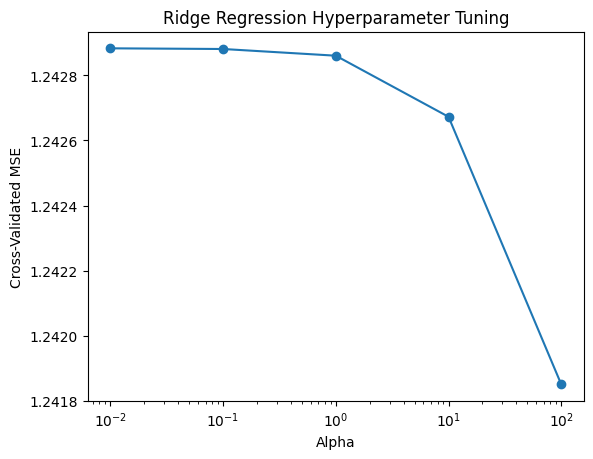

In [ ]:
plt.plot(alphas['ridge__alpha'], -ridge_grid.cv_results_['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Cross-Validated MSE')
plt.title('Ridge Regression Hyperparameter Tuning')
plt.show()

The optimal alpha is 100, minimizing cross-validated MSE. Larger alpha values cause underfitting due to excessive penalization.

**Lasso with Hyperparameter Tuning**    
Adds L1 regularization to shrink less important feature coefficients to zero, effectively performing feature selection. Using GridSearchCV to tune alpha over multiple values to find the best-performing model.

In [ ]:
from sklearn.linear_model import Lasso

lasso_pipe = make_pipeline(StandardScaler(), Lasso())
alphas = {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso_pipe, param_grid=alphas, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
#training
lasso_yhat_train = lasso_grid.predict(X_train)
lasso_train_mse = mean_squared_error(y_train, lasso_yhat_train)
lasso_train_r2 = r2_score(y_train, lasso_yhat_train)
#testing
lasso_yhat_test = lasso_grid.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_yhat_test)
lasso_r2 = r2_score(y_test, lasso_yhat_test)

results['Lasso'] = {'mse': f"{lasso_mse:.4f}", 'r2': f"{lasso_r2:.4f}"} #add to dict

print("Lasso Best alpha:", lasso_grid.best_params_)
print(f"Lasso Train MSE: {lasso_train_mse:.4f}")
print(f"Lasso Train R²:  {lasso_train_r2:.4f}")
print()
print(f"Lasso Test MSE:  {lasso_mse:.4f}")
print(f"Lasso Test R²:   {lasso_r2:.4f}")

Lasso Best alpha: {'lasso__alpha': 0.01}
Lasso Train MSE: 1.2197
Lasso Train R²:  0.4731

Lasso Test MSE:  1.0707
Lasso Test R²:   0.5163


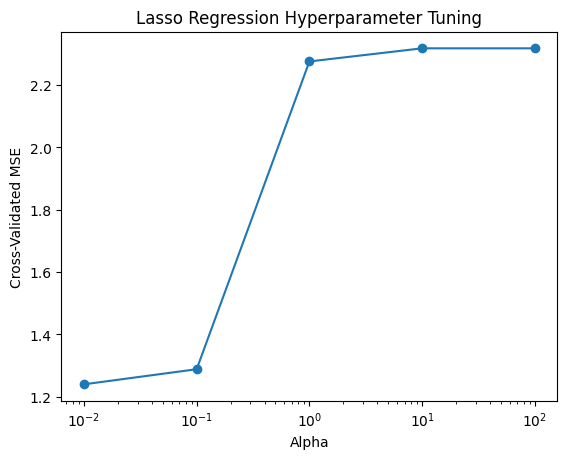

In [ ]:
plt.plot(alphas['lasso__alpha'], -lasso_grid.cv_results_['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Cross-Validated MSE')
plt.title('Lasso Regression Hyperparameter Tuning')
plt.show()

Lasso Regression performs best with a small alpha = 0.01; higher alpha values cause underfitting and significantly worsen model performance.

**Elastic Net with Hyperparameter Tuning**   
Combines both L1 and L2 regularization to balance feature selection and model complexity reduction. Using GridSearchCV to tune both alpha and the mix between L1 and L2 penalties (l1_ratio) to find the best-performing model.

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_pipe = make_pipeline(StandardScaler(), ElasticNet())
parameters = {'elasticnet__alpha': [0.01, 0.1, 1, 10, 100], 'elasticnet__l1_ratio': [0.2, 0.5, 0.8]}
elastic_grid = GridSearchCV(elastic_pipe, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')
elastic_grid.fit(X_train, y_train)
#training
elastic_yhat_train = elastic_grid.predict(X_train)
elastic_train_mse = mean_squared_error(y_train, elastic_yhat_train)
elastic_train_r2 = r2_score(y_train, elastic_yhat_train)
#testing
elastic_yhat_test = elastic_grid.predict(X_test)
elastic_mse = mean_squared_error(y_test, elastic_yhat_test)
elastic_r2 = r2_score(y_test, elastic_yhat_test)

results['ElasticNet'] = {'mse': f"{elastic_mse:.4f}", 'r2': f"{elastic_r2:.4f}"} #add to dict

print("Elastic Best Parameters:", elastic_grid.best_params_)
print(f"Elastic Train MSE: {elastic_train_mse:.4f}")
print(f"Elastic Train R²: {elastic_train_r2:.4f}")
print()
print(f"Elastic Test MSE: {elastic_mse:.4f}")
print(f"Elastic Test R²: {elastic_r2:.4f}")

Elastic Best Parameters: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.8}
Elastic Train MSE: 1.2188
Elastic Train R²: 0.4735

Elastic Test MSE: 1.0714
Elastic Test R²: 0.5160


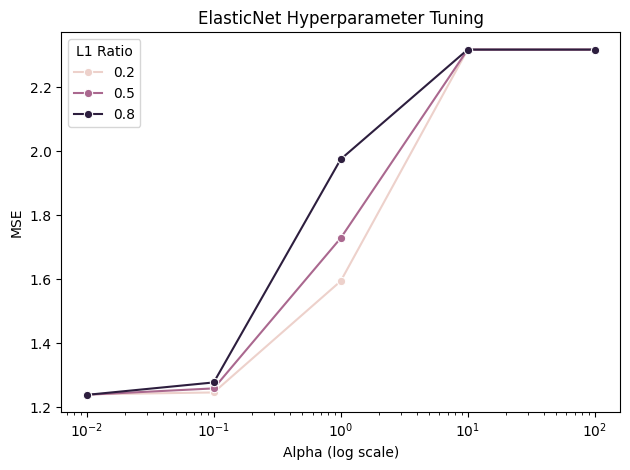

In [ ]:
elastic_cv_df = pd.DataFrame(elastic_grid.cv_results_)

elastic_cv_df['mean_mse'] = -elastic_cv_df['mean_test_score'] #convert to pos

#plot alpha vs. mean CV MSE
sns.lineplot(data=elastic_cv_df, x='param_elasticnet__alpha', y='mean_mse', hue='param_elasticnet__l1_ratio', marker='o')

plt.xscale('log') #for clarity
plt.xlabel("Alpha (log scale)")
plt.ylabel("MSE")
plt.title("ElasticNet Hyperparameter Tuning")
plt.legend(title="L1 Ratio")
plt.tight_layout()
plt.show()

This plots shows the relationship between alpha and MSE for different L1 ratios. As alpha increases, the MSE also increases sharply, indicating that too much regularization harms model performance.

**KNN Regression with Cross-Validation**   
Predicts a target value based on the average of its nearest neighbors.
Using 5-fold cross-validation to tune the number of neighbors (k) from 1 to 50 to find the value that minimizes the average MSE.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

knn_pipeline = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('regressor', KNeighborsRegressor())
])
k_results = []

neighbors_list = range(1, 51)
for k in neighbors_list:
    model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    mses = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_mse = -np.mean(mses)
    k_results.append((k, avg_mse))

best_k, best_mse = min(k_results, key=lambda x: x[1])
print(f"Best k = {best_k} with Avg CV MSE = {best_mse:.4f}")

Best k = 16 with Avg CV MSE = 1.6721


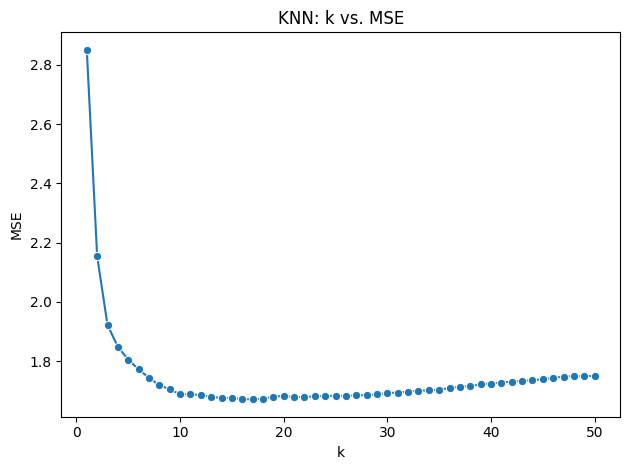

In [ ]:
knn_cv_df = pd.DataFrame(k_results, columns=['k', 'cv_mse'])

sns.lineplot(data=knn_cv_df, x='k', y='cv_mse', marker='o')
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("KNN: k vs. MSE")
plt.tight_layout()
plt.show()

In [ ]:
#get training and testing for best k
knn_best = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=best_k))
knn_best.fit(X_train, y_train)
#training
y_train_pred = knn_best.predict(X_train)
knn_train_mse = mean_squared_error(y_train, y_train_pred)
knn_train_r2 = r2_score(y_train, y_train_pred)
#testing
y_pred_best = knn_best.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred_best)
knn_r2  = r2_score(y_test, y_pred_best)

results['KNN_16'] = {'mse': f"{knn_mse:.4f}", 'r2': f"{knn_r2:.4f}"}

print("KNN Best k:", best_k)
print(f"KNN Train MSE: {knn_train_mse:.4f}")
print(f"KNN Train R²: {knn_train_r2:.4f}")
print()
print(f"KNN Test MSE: {knn_mse:.4f}")
print(f"KNN Test R²: {knn_r2:.4f}")

KNN Best k: 16
KNN Train MSE: 1.4446
KNN Train R²: 0.3760

KNN Test MSE: 1.5263
KNN Test R²: 0.3105


**Decision Tree Regression**  
Splits the data into regions to make predictions by learning simple decision rules.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=5)
dt.fit(X_train, y_train)
#training
dt_y_pred = dt.predict(X_train)
dt_train_mse = mean_squared_error(y_train, dt_y_pred)
dt_train_r2 = r2_score(y_train, dt_y_pred)
#testing
dt_y_pred = dt.predict(X_test)
dt_test_mse = mean_squared_error(y_test, dt_y_pred)
dt_test_r2 = r2_score(y_test, dt_y_pred)

results['DecisionTree'] = {'mse': f"{dt_test_mse:.4f}", 'r2': f"{dt_test_r2:.4f}"}

print(f"Decision Tree Train MSE, {dt_train_mse:.4f}")
print(f"Decision Tree Train R², {dt_train_r2:.4f}")
print()
print(f"Decision Tree MSE: {dt_test_mse:.4f}")
print(f"Decision Tree R²: {dt_test_r2:.4f}")

Decision Tree Train MSE, 0.0000
Decision Tree Train R², 1.0000

Decision Tree MSE: 0.7603
Decision Tree R²: 0.6565


**Decision Tree with Cost Complexity Pruning**   
Apply cost complexity pruning to simplify the decision tree and reduce overfitting. By tuning the pruning parameter (alpha), we aim to find the optimal balance between model complexity and predictive performance.

In [ ]:
# cost complexity pruning
path = DecisionTreeRegressor(random_state=5).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

train_scores = []
test_scores = []
test_mse_scores = []
models = []

for alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=5, ccp_alpha=alpha)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))
    test_mse_scores.append(mean_squared_error(y_test, y_test_pred))
    models.append(model)


best_index = test_mse_scores.index(min(test_mse_scores))
best_alpha = ccp_alphas[best_index]
best_model = models[best_index]

#training
y_train_best = best_model.predict(X_train)
best_train_mse = mean_squared_error(y_train, y_train_best)
best_train_r2 = r2_score(y_train, y_train_best)

#testing
y_test_best = best_model.predict(X_test)
best_test_mse = test_mse_scores[best_index]
best_test_r2 = test_scores[best_index]

results['DecisionTreePruned'] = {'mse': round(best_test_mse, 4),'r2': round(best_test_r2, 4)}


print(f"Best ccp_alpha (min Test MSE): {best_alpha:.6f}")
print(f"Train MSE of Best Model: {best_train_mse:.4f}")
print(f"Train R² of Best Model:  {best_train_r2:.4f}")
print()
print(f"Test MSE of Best Model:  {best_test_mse:.4f}")
print(f"Test R² of Best Model:   {best_test_r2:.4f}")

Best ccp_alpha (min Test MSE): 0.002465
Train MSE of Best Model: 0.4393
Train R² of Best Model:  0.8102

Test MSE of Best Model:  0.3860
Test R² of Best Model:   0.8256


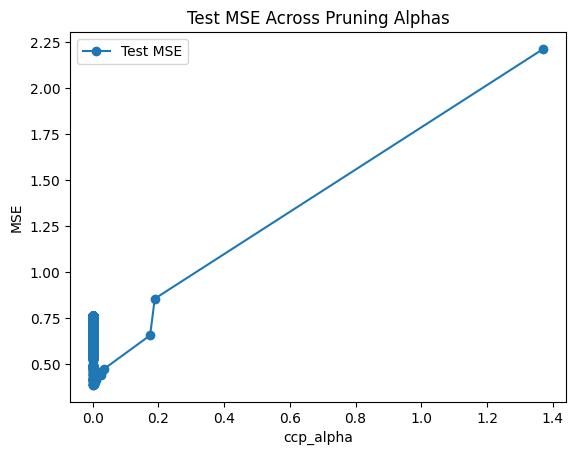

In [ ]:
plt.figure()
plt.plot(ccp_alphas, test_mse_scores, label='Test MSE', marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('MSE')
plt.title('Test MSE Across Pruning Alphas')
plt.legend()
plt.show()

This plot shows how the train and test R² scores vary as we adjust the pruning parameter (ccp_alpha) for the Decision Tree. Initially, both training and testing R² scores are high with little pruning (low alpha), but as alpha increases, both scores drop sharply due to underfitting. We selected the alpha value that balances model complexity and generalization, achieving a high test R² without overfitting.

**Decision Tree with Pruning and Cross Validation**  
Uses cross-validation to select the optimal pruning parameter (alpha) that controls the complexity of the Decision Tree and prevents overfitting.

In [ ]:
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error


path = DecisionTreeRegressor(random_state=5).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas


param_grid = {'ccp_alpha': ccp_alphas}
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=5),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    return_train_score=True,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['ccp_alpha']
best_cv_r2 = grid_search.best_score_

#training
y_train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

#testing
y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

results['DecisionTreePrunedwCV'] = {'mse': f"{test_mse:.4f}", 'r2':  f"{test_r2:.4f}"}

print("Best ccp_alpha (min Test MSE):", best_alpha)
print(f"Decision Tree Train MSE: {train_mse:.4f}")
print(f"Decision Tree Train R²: {train_r2:.4f}")
print()
print(f"Decision Tree Test MSE: {test_mse:.4f}")
print(f"Decision Tree Test R²: {test_r2:.4f}")

Best ccp_alpha (min Test MSE): 0.004063228146006945
Decision Tree Train MSE: 0.4679
Decision Tree Train R²: 0.7979

Decision Tree Test MSE: 0.3912
Decision Tree Test R²: 0.8233


In [ ]:
feature_importances = best_model.feature_importances_
feature_names = X_train.columns

for name, importance in zip(feature_names, feature_importances):
    if importance > 0:
        print(f"{name}: {importance:.4f}")

weeks_on_chart: 0.9914
artist_popularity: 0.0030
Total Nominations: 0.0056


**Boosting with AdaBoost Regressor**   
Apply AdaBoost Regression, where each model corrects the errors of its predecessor, and tune the number of estimators, learning rate, and maximum depth using GridSearchCV to optimize performance.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'estimator__max_depth': [2, 3, 5]
}

grid_search = GridSearchCV(
    estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# training
y_train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# testing
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

results[f"Ada Boosting with CV"] = {'mse': round(test_mse, 4),'r2': round(test_r2, 4)}

# Print results
print(f"Best Parameters: {best_params}")
print(f"Boosting Train MSE: {train_mse:.4f}")
print(f"Boosting Train R²: {train_r2:.4f}")
print()
print(f"Boosting Test MSE: {test_mse:.4f}")
print(f"Boosting Test R²: {test_r2:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'estimator__max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 50}
Boosting Train MSE: 0.4223
Boosting Train R²: 0.8176

Boosting Test MSE: 0.3664
Boosting Test R²: 0.8345


**Gradient Boosting Regression with Hyperparameter Tuning**   
Apply Gradient Boosting that minimizing prediction errors at each stage.
Using GridSearchCV to tune the number of estimators, learning rate, and tree depth to optimize performance.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_validate, KFold

param_grid = {
    'gbr__n_estimators': [100, 200],
    'gbr__learning_rate': [0.01, 0.1],
    'gbr__max_depth': [3, 5]
}


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gbr', GradientBoostingRegressor(random_state=42))
])

# Inner CV: for GridSearchCV
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=inner_cv,
                           scoring='neg_mean_squared_error', n_jobs=-1)

# Outer CV: for evaluating generalization
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {'mse': 'neg_mean_squared_error','r2': 'r2'}
cv_results = cross_validate(grid_search, X, y, cv=outer_cv,
                             scoring=scoring, return_train_score=True, n_jobs=-1)

nested_mse = -cv_results['test_mse']
nested_r2 = cv_results['test_r2']

train_mse = -cv_results['train_mse']
train_r2 = cv_results['train_r2']

print("Gradient Boosting Nested CV Results:")
print("Training Set:")
print("Training MSE scores:", train_mse)
print(f"Mean Train MSE: {train_mse.mean():.4f}")
print("Training R² scores:", train_r2)
print(f"Mean Train R²: {train_r2.mean():.4f}")
print()
print("Testing Set:")
print("Nested CV MSE scores:", nested_mse)
print(f"Mean Test MSE: {nested_mse.mean():.4f}")
print("Nested CV R² scores:", nested_r2)
print(f"Mean Test R²: {nested_r2.mean():.4f}")


Gradient Boosting Nested CV Results:
Training Set:
Training MSE scores: [0.36319702 0.34847416 0.36421802 0.34521767 0.36747437]
Mean Train MSE: 0.3577
Training R² scores: [0.83972238 0.84858092 0.841763   0.8503529  0.84003664]
Mean Train R²: 0.8441

Testing Set:
Nested CV MSE scores: [0.41169948 0.46473145 0.40338069 0.47806649 0.38823751]
Mean Test MSE: 0.4292
Nested CV R² scores: [0.829111   0.79474271 0.82191752 0.78713713 0.83006323]
Mean Test R²: 0.8126


In [ ]:
# fit on final model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

#training
y_train_pred = best_model.predict(X_train)
train_mse_final = mean_squared_error(y_train, y_train_pred)
train_r2_final = r2_score(y_train, y_train_pred)

#testing
y_test_pred = best_model.predict(X_test)
test_mse_final = mean_squared_error(y_test, y_test_pred)
test_r2_final = r2_score(y_test, y_test_pred)

results['GradientBoosting with CV'] = {'mse': round(test_mse_final, 4),'r2': round(test_r2_final, 4)}

print("Gradient Boosting:", grid_search.best_params_)
print()
print(f"Train MSE: {train_mse_final:.4f}")
print(f"Train R²: {train_r2_final:.4f}")
print()
print(f"Test MSE: {test_mse_final:.4f}")
print(f"Test R²: {test_r2_final:.4f}")

Gradient Boosting: {'gbr__learning_rate': 0.1, 'gbr__max_depth': 3, 'gbr__n_estimators': 100}

Train MSE: 0.3783
Train R²: 0.8366

Test MSE: 0.3654
Test R²: 0.8349


**Random Forest Regression with Nested Cross-Validation**  
Apply Random Forest that averages their predictions to reduce overfitting and improve accuracy. Using nested cross-validation to tune the number of trees (n_estimators) and tree depth (max_depth) to optimize model performance and ensure robust evaluation.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

rf = RandomForestRegressor(random_state=42)


inner_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

nested_cv_scores = cross_val_score(inner_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error', verbose=2)

nested_mse = -nested_cv_scores
print("Nested CV MSEs (train folds):", nested_mse)
print("Mean Nested CV MSE:", nested_mse.mean())

inner_cv.fit(X_train, y_train)
final_rf = inner_cv.best_estimator_
print("Best RF parameters:", inner_cv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   5.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   6.8s
[CV] END ...................max_depth=None, n_estimators=100; total time=   5.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   6.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   5.5s
[CV] END ...................max_depth=None, n_estimators=200; total time=  11.9s
[CV] END ...................max_depth=None, n_estimators=200; total time=  12.0s
[CV] END ...................max_depth=None, n_estimators=200; total time=  11.7s
[CV] END ...................max_depth=None, n_estimators=200; total time=  11.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=  11.9s
[CV] END ...................max_depth=None, n_estimators=300; total time=  17.8s
[CV] END ...................max_depth=None, n_es

In [ ]:
#final train of the model
y_pred_train = final_rf.predict(X_train)
rf_mse_train = mean_squared_error(y_train, y_pred_train)
rf_r2_train  = r2_score(y_train, y_pred_train)

#testing
y_pred_test = final_rf.predict(X_test)
rf_mse_test = mean_squared_error(y_test, y_pred_test)
rf_r2_test  = r2_score(y_test, y_pred_test)

results['RandomForest'] = {'mse': round(rf_mse_test, 4),'r2': round(rf_r2_test, 4)}

print("Best RF parameters:", inner_cv.best_params_)
print(f"Train MSE: {rf_mse_train:.4f}")
print(f"Train r2:  {rf_r2_train:.4f}")
print()
print(f"Test MSE:  {rf_mse_test:.4f}")
print(f"Test r2:   {rf_r2_test:.4f}")

Best RF parameters: {'max_depth': 10, 'n_estimators': 300}
Train MSE: 0.2047
Train r2:  0.9116

Test MSE:  0.3760
Test r2:   0.8301


In [ ]:
#Comparing all models
results_df = pd.DataFrame(results).T
results_df['model'] = results_df.index
results_df = results_df.reset_index(drop=True)
results_df = results_df[['model', 'mse', 'r2']]
results_df

,model,mse,r2
0,Baseline,2.2136,-9.7698e-10
1,Ridge,1.0758,0.5140
2,Lasso,1.0707,0.5163
3,ElasticNet,1.0714,0.5160
4,KNN_16,1.5263,0.3105
5,DecisionTree,0.7603,0.6565
6,Linear Regression,1.0719,0.5158
7,DecisionTreePruned,0.386,0.8256
8,DecisionTreePrunedwCV,0.3912,0.8233
9,Ada Boosting with CV,0.3664,0.8345


**Conclusion**   
After evaluating various models, Gradient Boosting achieved the best performance, with the lowest test MSE and the highest R². K-Nearest Neighbors showed the weakest performance, suggesting that distance-based methods may not be well-suited for our complex, high-dimensional, and noisy dataset. Linear Regression and the regularized linear models (Ridge, Lasso, Elastic Net) demonstrated significant improvements as compared to the baseline model, with MSEs around 1 and R² values around 0.5. A single decision tree improved those results and applying a cost-complexity pruning further improved mse by reducing overfitting. However, ensemble methods consistently outperformed all other models, suggesting their superior ability to capture complex relationships within the data. Overall, Gradient Boosting slightly outperformed Random Forest and AdaBoosting in both MSE and R². This superior performance is attributed to Gradient Boosting’s sequential learning process, which focuses on correcting the residual errors of previous trees and effectively captures complex interactions and outliers that other methods may miss.
